In [480]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rich.progress import track
from datetime import datetime, date, time

In [431]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

In [432]:
jmfile = 'test_026.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684660122572,45,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-1,text,True,NaN,323,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,42,0,10,500,200
1,1684660122602,22,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-2,text,True,NaN,322,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,22,0,4,500,200
2,1684660122616,24,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-3,text,True,NaN,322,138,4,5,http://193.225.250.30/cpu/fibonacci_no_gc/16,24,0,6,500,200


In [433]:
# Beérkezés sorrendje helyett a kiküldés sorrendjében rendezve

jf = jf.sort_values(by='timeStamp', ignore_index=True)

jf = jf.reset_index(drop=True)

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684660122572,45,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-1,text,True,NaN,323,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,42,0,10,500,200
1,1684660122602,22,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-2,text,True,NaN,322,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,22,0,4,500,200
2,1684660122616,24,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-3,text,True,NaN,322,138,4,5,http://193.225.250.30/cpu/fibonacci_no_gc/16,24,0,6,500,200


In [434]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

print(FIBO.shape)
print(PRIME.shape)

(36792, 19)
(34926, 19)


In [435]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-26 16:57:23.486601
Second: 23


In [436]:
jf = jf.astype({'timeStamp':'int'})
FIBO  = FIBO.astype({'timeStamp':'int'})
PRIME = PRIME.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
FIBO['date'] = FIBO['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
PRIME['date'] = PRIME['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

FIBO.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1684660122572,45,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-1,text,True,NaN,323,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,42,0,10,500,200,2023-05-21 09:08:42.572
1,1684660122602,22,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-2,text,True,NaN,322,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,22,0,4,500,200,2023-05-21 09:08:42.602


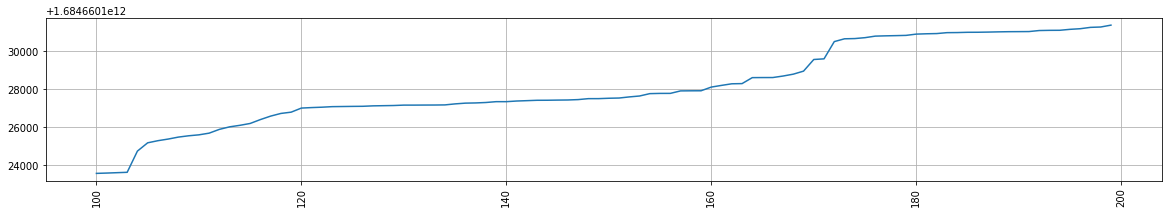

In [282]:
F = 100

plt.figure(figsize=(20, 3))
plt.plot(jf.iloc[F:F+100]['timeStamp'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

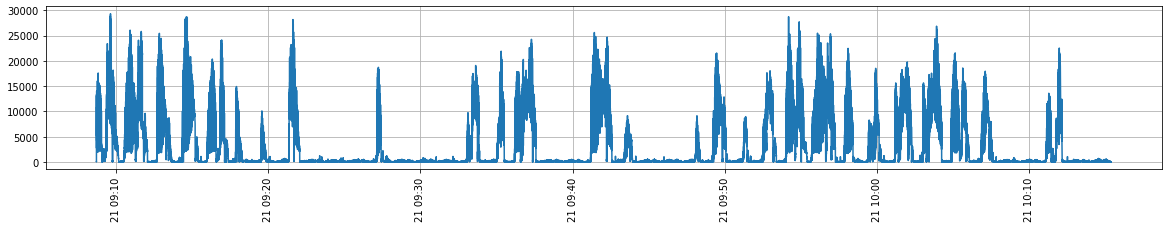

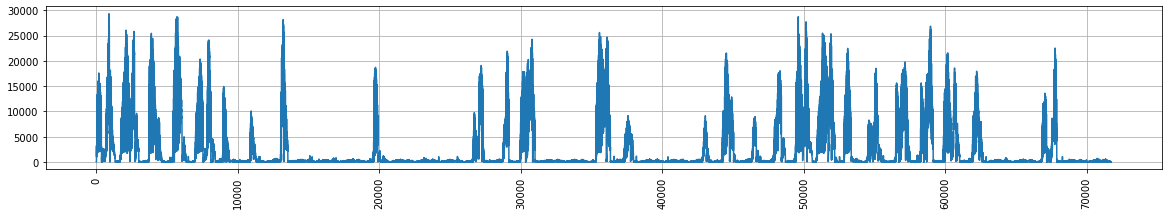

In [437]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

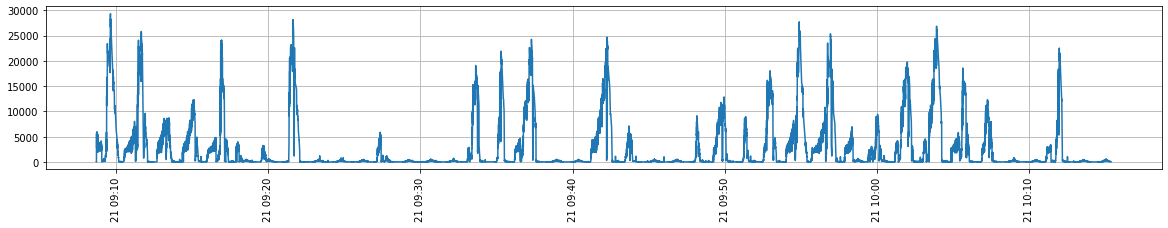

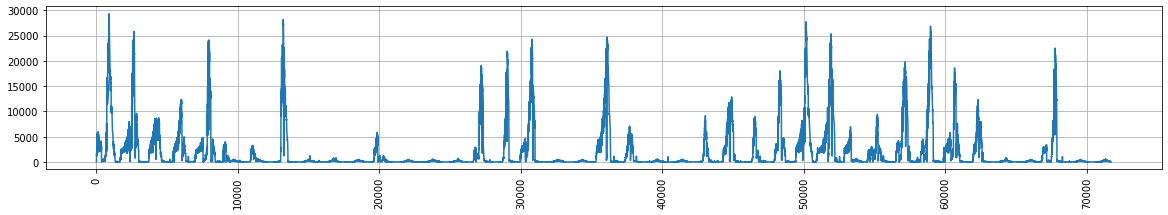

In [438]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

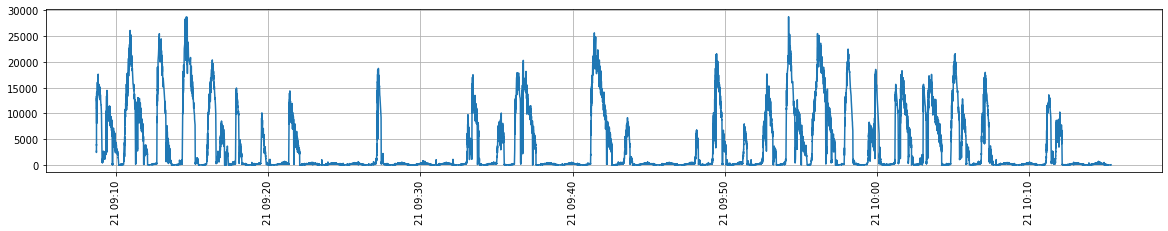

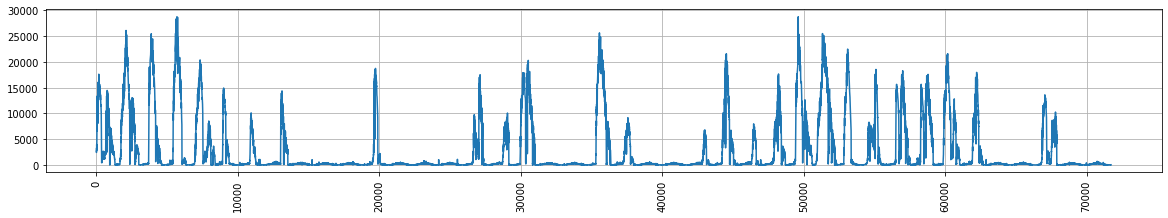

In [439]:
plt.figure(figsize=(20, 3))
plt.plot(PRIME['date'], PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

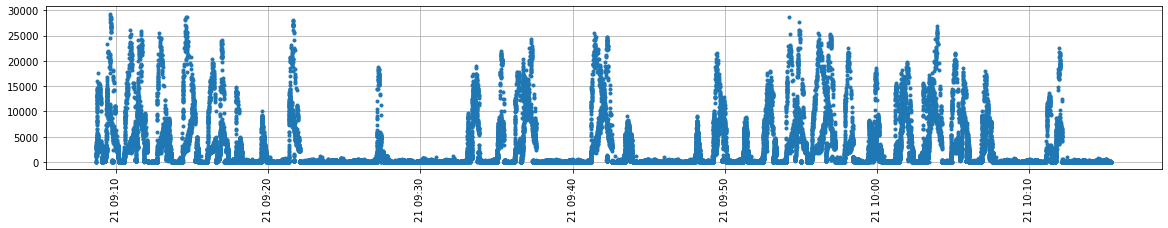

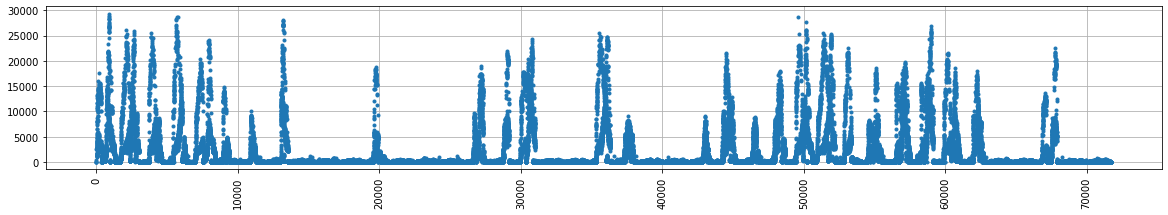

In [440]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [441]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

In [442]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


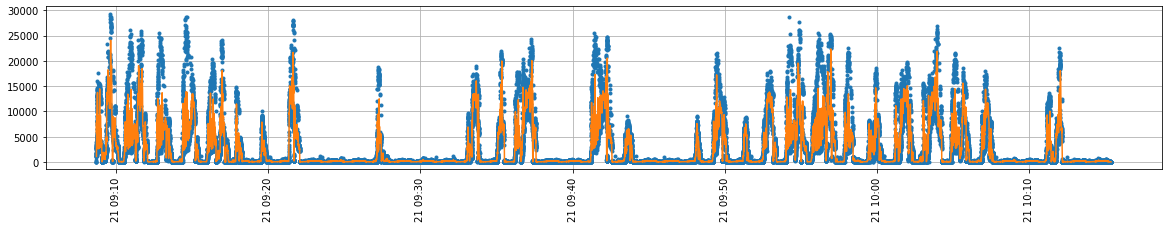

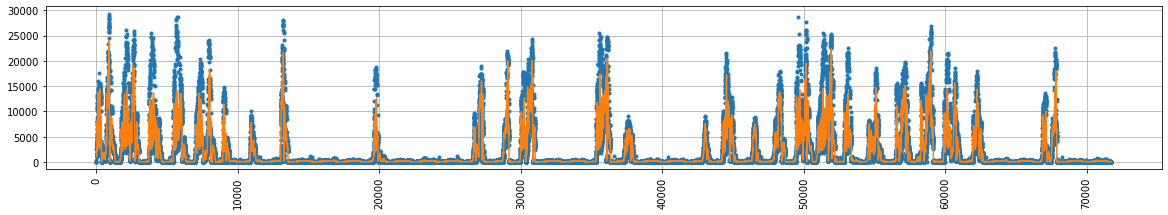

In [443]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [444]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
9     1873.721058
10    1787.059983
Name: Latency, dtype: float64

In [445]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
0      903.092812
1     5270.628668
2     1566.024254
3     7769.027595
4     1798.119048
5     5380.459977
6      824.992295
7     3134.988844
8     1353.569921
9     2337.304175
10    1522.260250
11    4744.514938
12    1540.243206
13    1426.289643
14    1903.539991
15    1099.601202
16    4829.259881
17    1770.851613
18     678.067901
19    1115.780239
20     107.289759
21    4604.744828
22     252.823377
23     116.190833
24     158.479167
25     110.296420
26     109.776853
27    1790.763815
28     110.376872
29     107.230192
30     161.914095
31     117.745212
32     105.001668
33    4383.507724
34     106.179881
35    2890.165544
36    4801.074074
37    3926.367028
38     148.506234
39     104.311667
40     115.399332
41    5647.279859
42    3677.116438
43    1909.476860
44     105.445865
45     115.063545
46     157.500832
47     104.150000
48    1177.039496
49    4678.963580
50     492.537197
51    1415.176421
52    2960.854442
53    1426.393536
54    7160.451691
55   

In [446]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
9     8       6009.198718
      9       5635.348522
      10      3120.881566
      11      6719.715047
      12      2102.129954
                 ...     
10    11      3383.620183
      12       978.873849
      13       135.649416
      14       135.686877
      15       125.708889
Name: Latency, Length: 68, dtype: float64

In [447]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

42

In [448]:
jf['hour']   = jf['date'].map(lambda x : x.hour)
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [450]:
md = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [451]:
md

date  date  date
9     8     42       2525.418605
            43       7420.409836
            44       5983.000000
            45      12782.250000
            46      14307.571429
                        ...     
10    15    18         53.150000
            19         55.550000
            20         51.550000
            21         41.350000
            22         38.461538
Name: Latency, Length: 3998, dtype: float64

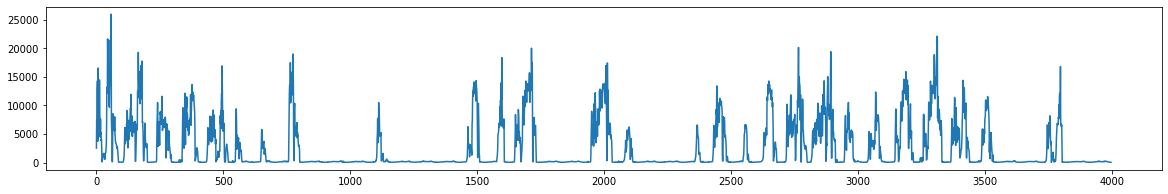

In [452]:
# Másodperc alapő válaszidő átlagok

plt.figure(figsize=(20, 3))
plt.plot(md.values)
plt.show()

In [453]:
_hours   = md.index.levels[0]
_minutes = md.index.levels[1]
_seconds = md.index.levels[2]

_hours_lowest =_hours.min()
_hours_highest = _hours.max()

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))
print(' hrs min %.1d hrs max %.1d' % (_hours_lowest, _hours_highest))

 sec min 0 sec max 59
 min min 0 min max 59
 hrs min 9 hrs max 10


In [455]:
tp = []

start_date = str(jf['date'].loc[0])[:11]

for _ in md.index:
    h = _[0]
    # h = str(_[0]).zfill(2)
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    s = str('%02d' % (_[2],))
    # print(h, m, s)
    tp.append(start_date + str(h) + ':' + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-21 09:08:42,2525.418605
1,2023-05-21 09:08:43,7420.409836
2,2023-05-21 09:08:44,5983.000000
3,2023-05-21 09:08:45,12782.250000
4,2023-05-21 09:08:46,14307.571429


In [456]:
mz = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  date  sec
9     8     4      5801.488372
            5      6264.385714
      9     0      1753.866667
            1      1293.896175
            2      9251.177914
                      ...     
10    14    4       155.919192
            5       177.328358
      15    0       187.201005
            1        85.646465
            2        44.490566
Name: Latency, Length: 401, dtype: float64

In [458]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:11]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    h = _[0]
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    
    if c == 0:
        c += 1
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(_first_sec))
        print(tz)
    else:
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(s*10))
        
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

['2023-05-21 09:08:42']


,date,md
0,2023-05-21 09:08:42,5801.488372
1,2023-05-21 09:08:50,6264.385714
2,2023-05-21 09:09:00,1753.866667
3,2023-05-21 09:09:10,1293.896175
4,2023-05-21 09:09:20,9251.177914


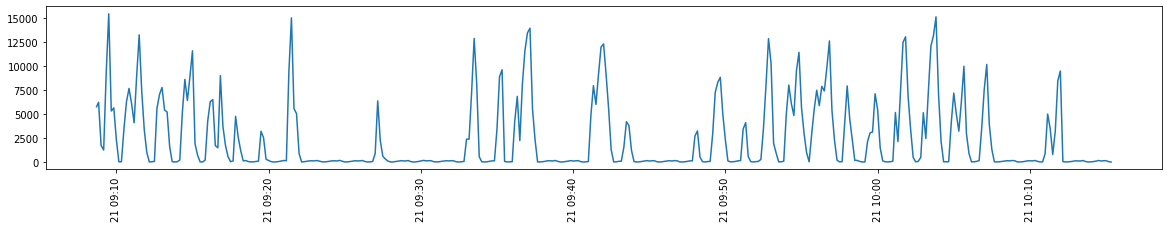

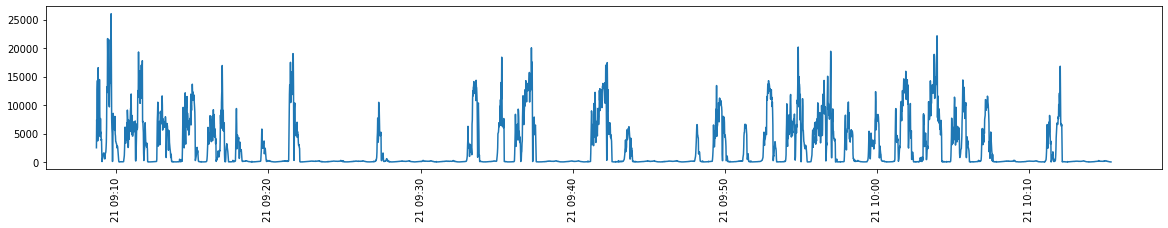

In [459]:
plt.figure(figsize=(20, 3))
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.figure(figsize=(20, 3))
plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [460]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-21 09:08:42
2023-05-21 09:08:42


In [461]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

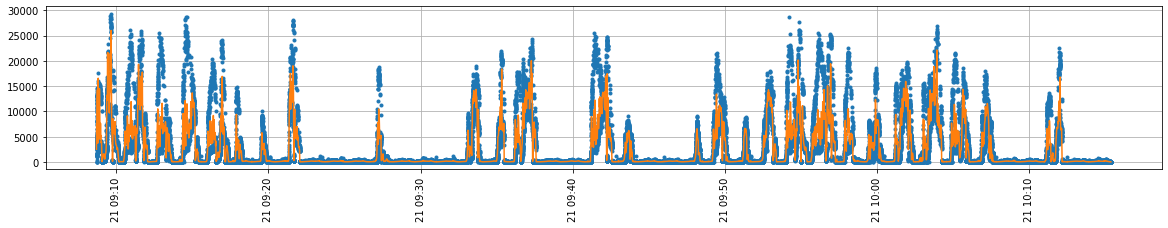

In [462]:
# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

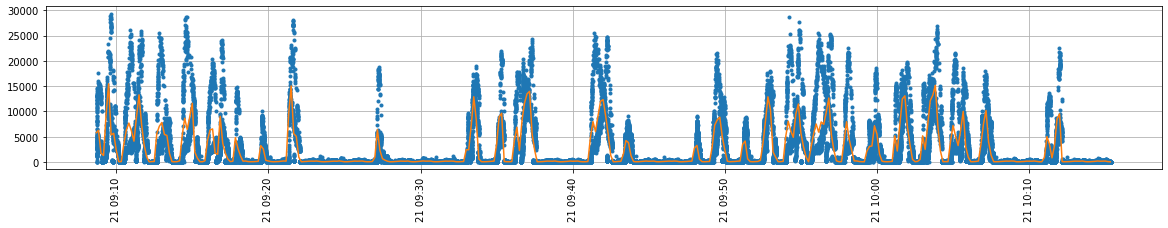

In [463]:
# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

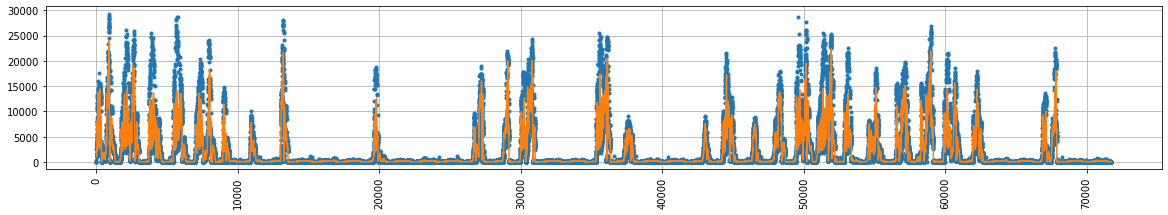

In [464]:
# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)

# Az erre helyezet 10-es mozgóátlag nem az elmúlt 10 mp hanem az utolsó 10 kérés válaszidejének átlaga
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

---

Most van az, hogy jól jönne a **Scaler.log** mert a **Metric.log** csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

A **Scaler.log**-ban csak a skálázáskor kiadott parancs időbélyege van eltárolva.

# Scaler.log - Metric.log - JMeter.log

In [508]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,09:08:55,09:08:5,8009.67920,3767.828744,1,13.3,96.2,0.0,100.0,...,104982.0,1075456.8,0.0,308228.8,100.0,81.6,81.6,82.7,81.6,82.7
1,192.168.0.6,09:09:03,09:09:0,3577.65165,2875.164904,1,9.4,95.3,0.0,100.0,...,104725.2,1084296.8,0.0,306062.4,100.0,82.9,82.9,82.7,82.9,82.8
2,192.168.0.6,09:09:12,09:09:1,3414.26700,1279.841000,4,13.7,97.1,0.1,99.9,...,104818.8,1085862.8,0.0,306144.8,100.0,42.0,42.0,47.2,42.0,47.3
3,192.168.0.6,09:09:22,09:09:2,2432.85030,1260.231949,2,17.8,96.7,1.0,99.0,...,104033.2,1080276.4,0.0,306056.0,100.0,54.7,54.7,53.4,54.7,53.5
4,192.168.0.6,09:09:44,09:09:3,14431.33115,8518.578188,1,15.4,97.0,0.0,100.0,...,104467.2,1091607.6,0.0,305139.2,100.0,55.1,55.1,54.5,54.6,54.0


In [511]:
jf[['date']].head(3)

,date
0,2023-05-21 09:08:42.572
1,2023-05-21 09:08:42.602
2,2023-05-21 09:08:42.616


In [512]:
df[['time']].head(3)

,time
0,09:08:5
1,09:09:0
2,09:09:1


In [513]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [514]:
scale_file_name = 'scaled_train_by_none.log'

sf = pd.read_csv(scale_file_name, sep=',', header=0)

display(sf.head(2))

,time,notification,actual_vm_number_was,actual_vm_number_is
0,09:09:03,Worker 192.168.0.73 added.,1,2
1,09:09:03,Worker 192.168.0.91 added.,2,3


In [515]:
print('Scaler.log')
print(sf['time'].iloc[0])
print(sf['time'].iloc[-1])
print(len(sf))

print('JMeter.log')
print(jf['date'].iloc[0])
print(jf['date'].iloc[-1])
print(len(jf))

Scaler.log
09:09:03
10:14:50
559
JMeter.log
2023-05-21 09:08:42.572000
2023-05-21 10:15:22.644000
71718


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [516]:
jf['date']

0       2023-05-21 09:08:42.572
1       2023-05-21 09:08:42.602
2       2023-05-21 09:08:42.616
3       2023-05-21 09:08:42.632
4       2023-05-21 09:08:42.637
                  ...          
71713   2023-05-21 10:15:22.437
71714   2023-05-21 10:15:22.465
71715   2023-05-21 10:15:22.542
71716   2023-05-21 10:15:22.598
71717   2023-05-21 10:15:22.644
Name: date, Length: 71718, dtype: datetime64[ns]

In [517]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0      09:09:03
1      09:09:03
2      09:09:03
3      09:09:12
4      09:09:12
         ...   
554    10:14:30
555    10:14:40
556    10:14:40
557    10:14:40
558    10:14:50
Name: time, Length: 559, dtype: object

In [519]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '
print(start_date)

sf['date'] = start_date + sf['time']
sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-05-21 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,09:09:03,Worker 192.168.0.73 added.,1,2,2023-05-21 09:09:03
1,09:09:03,Worker 192.168.0.91 added.,2,3,2023-05-21 09:09:03
2,09:09:03,Worker 192.168.0.93 added.,3,4,2023-05-21 09:09:03


In [520]:
sf['date']

0     2023-05-21 09:09:03
1     2023-05-21 09:09:03
2     2023-05-21 09:09:03
3     2023-05-21 09:09:12
4     2023-05-21 09:09:12
              ...        
554   2023-05-21 10:14:30
555   2023-05-21 10:14:40
556   2023-05-21 10:14:40
557   2023-05-21 10:14:40
558   2023-05-21 10:14:50
Name: date, Length: 559, dtype: datetime64[ns]

In [521]:
jf['date']

0       2023-05-21 09:08:42.572
1       2023-05-21 09:08:42.602
2       2023-05-21 09:08:42.616
3       2023-05-21 09:08:42.632
4       2023-05-21 09:08:42.637
                  ...          
71713   2023-05-21 10:15:22.437
71714   2023-05-21 10:15:22.465
71715   2023-05-21 10:15:22.542
71716   2023-05-21 10:15:22.598
71717   2023-05-21 10:15:22.644
Name: date, Length: 71718, dtype: datetime64[ns]

In [522]:
jf['date'].iloc[3]

Timestamp('2023-05-21 09:08:42.632000')

In [523]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [524]:
jf['dates'].iloc[3]

Timestamp('2023-05-21 09:08:42')

In [525]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

# Sajnos ez a megoldás ezen az adatbázison nem lesz jó

# -----------------------------------------------------


# Bár most azok után, hogy rendeztem az adatokat a time
# szerint már lehet, hogy jó lesz


_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in track(range(jf['Latency'].shape[0])):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]
    
    if c < len(sf):
        if jf_date == _current_scale_date:
            # print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
8


In [526]:
sf.iloc[88:100].head(100)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
88,09:21:40,Worker 192.168.0.73 added.,1,2,2023-05-21 09:21:40
89,09:21:42,Worker 192.168.0.73 removed.,2,1,2023-05-21 09:21:42
90,09:22:03,Worker 192.168.0.73 added.,1,2,2023-05-21 09:22:03
91,09:22:04,Worker 192.168.0.91 added.,2,3,2023-05-21 09:22:04
92,09:22:10,Worker 192.168.0.73 removed.,3,2,2023-05-21 09:22:10
93,09:22:20,Worker 192.168.0.73 added.,2,3,2023-05-21 09:22:20
94,09:22:20,Worker 192.168.0.93 added.,3,4,2023-05-21 09:22:20
95,09:22:20,Worker 192.168.0.146 added.,4,5,2023-05-21 09:22:20
96,09:22:30,Worker 192.168.0.148 added.,5,6,2023-05-21 09:22:30
97,09:22:30,Worker 192.168.0.192 added.,6,7,2023-05-21 09:22:30


Amúgy érdkes, hogy milyen időpontokban ad hozzá, vesz el vm-ket.

Megnéztem a programot amit írtam és akkor kerül bele a **Scale.log** filébe a bejegyzés és az időbélyeg,
amikor kiadta a skálázási parancsot.

Ez az esetek többségében 10-ik másodperc valahányszorosa.

Nem elfelejteni, hogy a tanulóadatok előállításánál nincs semmilyen számátás ami miatt késne a rendszer.

Ezért az a gyanúm, hogy a tényleges skálázásnál ez már nem így lesz.

Ennek ellenére látok néhány adatot amikor példul

    88 	09:21:40 	Worker 192.168.0.73 added.
    89 	09:21:42 	Worker 192.168.0.73 removed.

Nem teljesen értem, hogy a faszba fordulhatott elő, hogy két máodperc múlva is meg lett hívva ez az eljárás.

Ezért ennek most egy picit utána nézek.

## Sajnos meg is fejtettem az okát.

Ugye amikor túl van terhelve a rendszer akkor később érkezik be egy válaszidő ezért és mivel az egész rendszer akkor triggerelődik amikor bejön egy válaszidő ezért van ez a csúszkálás.

Ez megoldódna ha minden 10-ik másodpercben lefutna a rendszer de jelenleg nem így működik, és most még nem is foglalkozom vele, hogy átírjam a rendszert.

In [527]:
sf_second = sf['date'].dt.second

np.unique(sf_second, return_counts=True)

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 58, 59]),
 array([55, 12,  5,  9,  5,  1,  2,  2,  4, 54, 14, 11,  5,  4,  6,  6,  1,
        63,  6, 12,  8,  3,  8,  3,  3,  2, 56,  5,  6,  8,  5,  3,  1,  1,
        54, 10,  4,  4,  3,  1,  3,  1,  1,  3, 65,  8,  6,  5,  1,  1]))

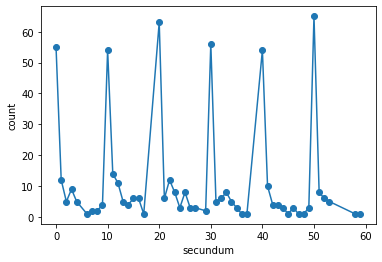

In [528]:
_ = np.unique(sf_second, return_counts=True)

plt.scatter(_[0], _[1])
plt.plot(_[0], _[1])
plt.xlabel('secundum')
plt.ylabel('count')
plt.show()

# többségében 10 valahányszorosára jön ki a skálázás, de sok olyan eset is van amikor nem.

In [529]:
# Van e bárhol ilyen dátum?

(jf['dates'] == '2023-05-21 09:22:03').any(axis=0)

True

In [530]:
jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1684660122572,45,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-1,text,True,NaN,323,...,200,2023-05-21 09:08:42.572,0,NaN,9,8,42,4,2023-05-21 09:08:42,1
1,1684660122602,22,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-2,text,True,NaN,322,...,200,2023-05-21 09:08:42.602,1,NaN,9,8,42,4,2023-05-21 09:08:42,1
2,1684660122616,24,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-3,text,True,NaN,322,...,200,2023-05-21 09:08:42.616,2,NaN,9,8,42,4,2023-05-21 09:08:42,1


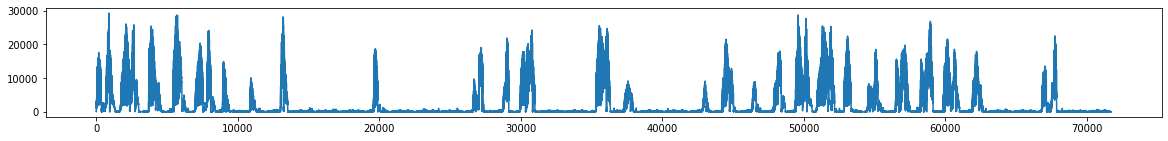

In [534]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['Latency'])
plt.show()

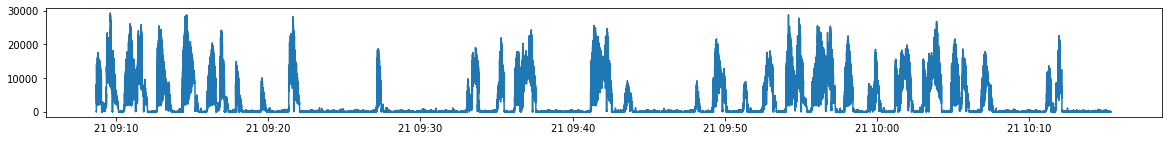

In [535]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['Latency'])
plt.show()

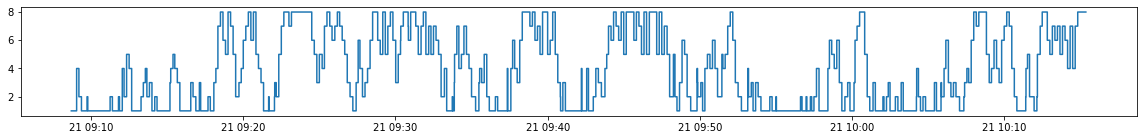

In [536]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

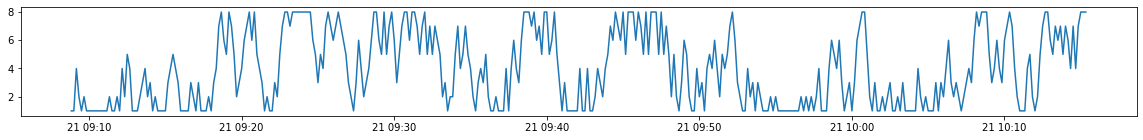

In [537]:
# Metric.log-ból kiolvasott VM Number

plt.figure(figsize=(20,2))
plt.plot(df['nntime'], df['worker_number'])
plt.show()

In [64]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


## Ezt feljebb már megcsináltam

De most itt hagyom mert csak plottolás

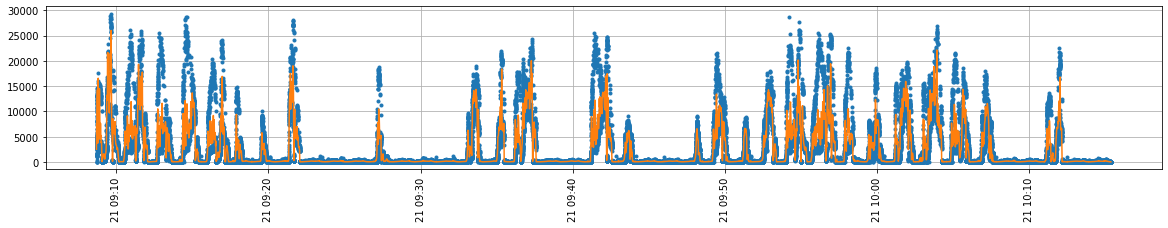

In [539]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Ezen dolgoztam

Hogy a JMeter.log és a Metric.log vagyis Scale.log wm_number egy df-be és egy ábrára kerüljenek.

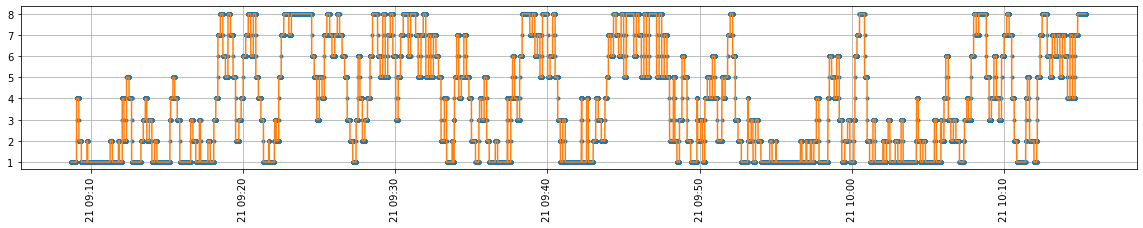

In [540]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [543]:
# Ellenőrzés (felületes)

sf.tail(5)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
554,10:14:30,Worker 192.168.0.93 removed.,5,4,2023-05-21 10:14:30
555,10:14:40,Worker 192.168.0.73 added.,4,5,2023-05-21 10:14:40
556,10:14:40,Worker 192.168.0.91 added.,5,6,2023-05-21 10:14:40
557,10:14:40,Worker 192.168.0.93 added.,6,7,2023-05-21 10:14:40
558,10:14:50,Worker 192.168.0.146 added.,7,8,2023-05-21 10:14:50


## Ezen dolgoztam

A két logfiléből kinyert adat együtt - JMeter.log és Scale.log vm_number

**tp\['date'\]** és **tp\['md'\]** a JMeter.log-ból számolt másodpercekre lebontott átlagú **Latency** a JMetric.log-ból.

**jf\['date'\]** és **jf\['sf_vm'\]** a Scaler.log alapján a JMeter df-be létrehozott **Worker Number**

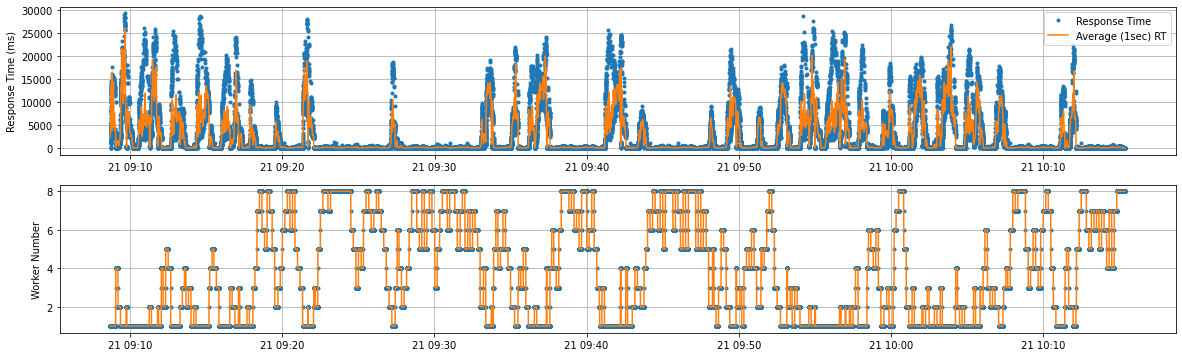

In [575]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## A jf alapján meg lehet nézni mindkét API-t

A jf alapján meg lehet nézni mindkét API-t?

In [562]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

## JMeter.log alapján

A két REST API 10 másodpercenként mért átlagos válaszideje - a **JMeter.csv** alapján.

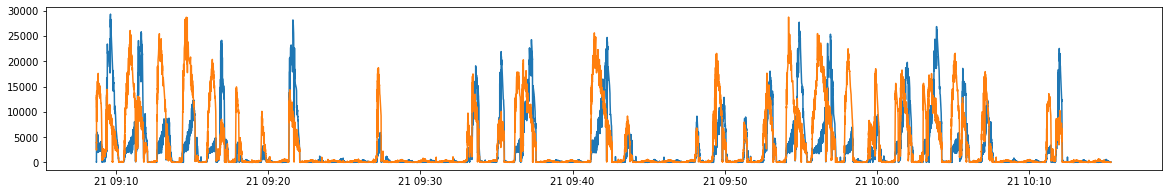

In [567]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.plot(PRIME['date'], PRIME['Latency'])
plt.show()

## JMeter.log és Scaler.log alapján

Mellé teszem a **Scaler.log** alapján kinyert **worker_number** válotzót is.

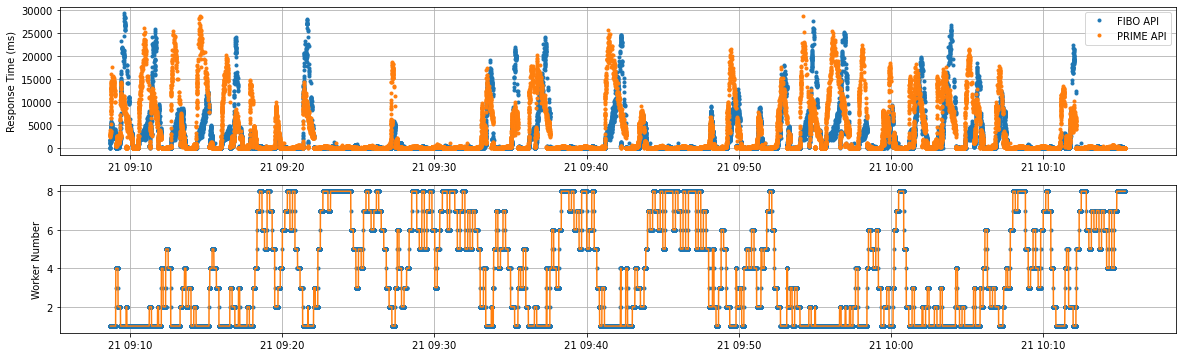

In [573]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(FIBO['date'], FIBO['Latency'], marker='.', linewidth=0, label='FIBO API')
ax0.plot(PRIME['date'], PRIME['Latency'], marker='.', linewidth=0, label='PRIME API')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test26 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

## Fontos

Ami itt kövektezik, az nem lehet annyira pontos mint a JMeter.log és a Scaler.log alapján összerakott megoldás.

**Miért?**

Mert a Metric.log filokban a MyLog.log fileből és az Access.log-ból kinyert és 10 másodpercre aggregált átlagok vannak.

**Megjegyzés:**

A **Metric.log** fájlba az idő **HH:MM:S** formátumba kerül. Ezért még hozzá kell adnom az **Y-m-d** adatot és egy **0**-t a **s** mögé.

Azt viszont, hogy mi volt az **Év-Hónap-Nap** a **Metric.log** filéből nem lehet megtudni, de ha rendesen tároltam el a teszt mérési eredményket akkor a könyvtárban ott van a **JMeter.csv** file is amiben viszont benne van a dátum.

Ha egy mérés nem csúszik át egyik napból a másikba akkor egyszerűen ki lehet olvani a **JMeter.csv** file első sorából a dátumot és azt beilleszteni a **Metric.log** adataiba.

Egyszerűbb lett volna, ha a **Metric.log** készítésénél beillesztem a dátumot is amikor a mérés zajlik de most már így alakult és nem fogok 26 mérést újra csinálni.

In [545]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


## Csak a Metric.log alapján

Ennél a megoldásnál jobb az amelyiket a **JMeter.csv** és a **Scaler.log** alapján raktam össze, mert sokkal nagyobb a felbontása (kérés alapú, vagy másodperc alapú)

De mivel a metrikákat és a tényleges döntéseket is ez alapján hozza meg az optimizer ezért látni akarom ezt is.

Itt viszont REST API-ra szétbontva nézem meg a válaszidő és a virtuális gépek számának alakulását a tisztán a **Metric.log** alapján.

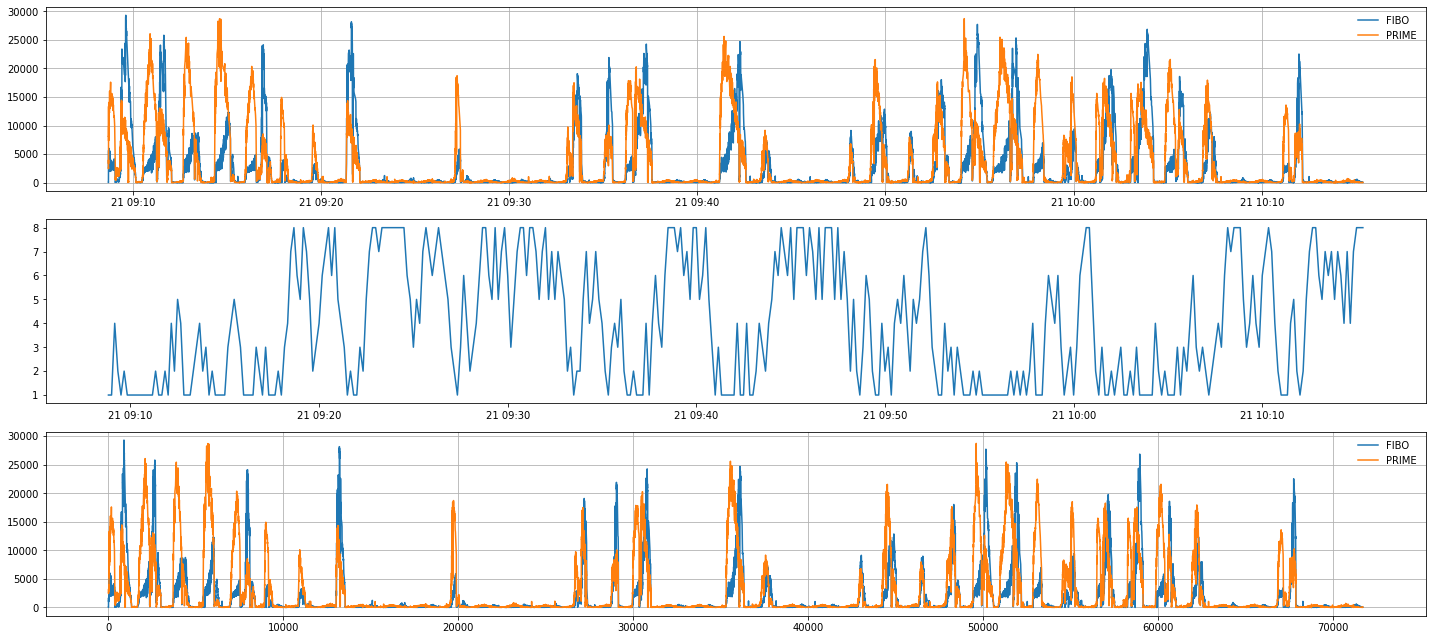

In [546]:
# Teljesen jó,

# ---

# Kiegészítés

# Azért ez még mindíg nem tökéletes

# Az igazi az lenne ha a scaler.log-ból olvasnám ki, hogy mikor volt skálázás és azt tenném rá.


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(FIBO['date'], FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax0.plot(PRIME['date'], PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax2.plot(PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

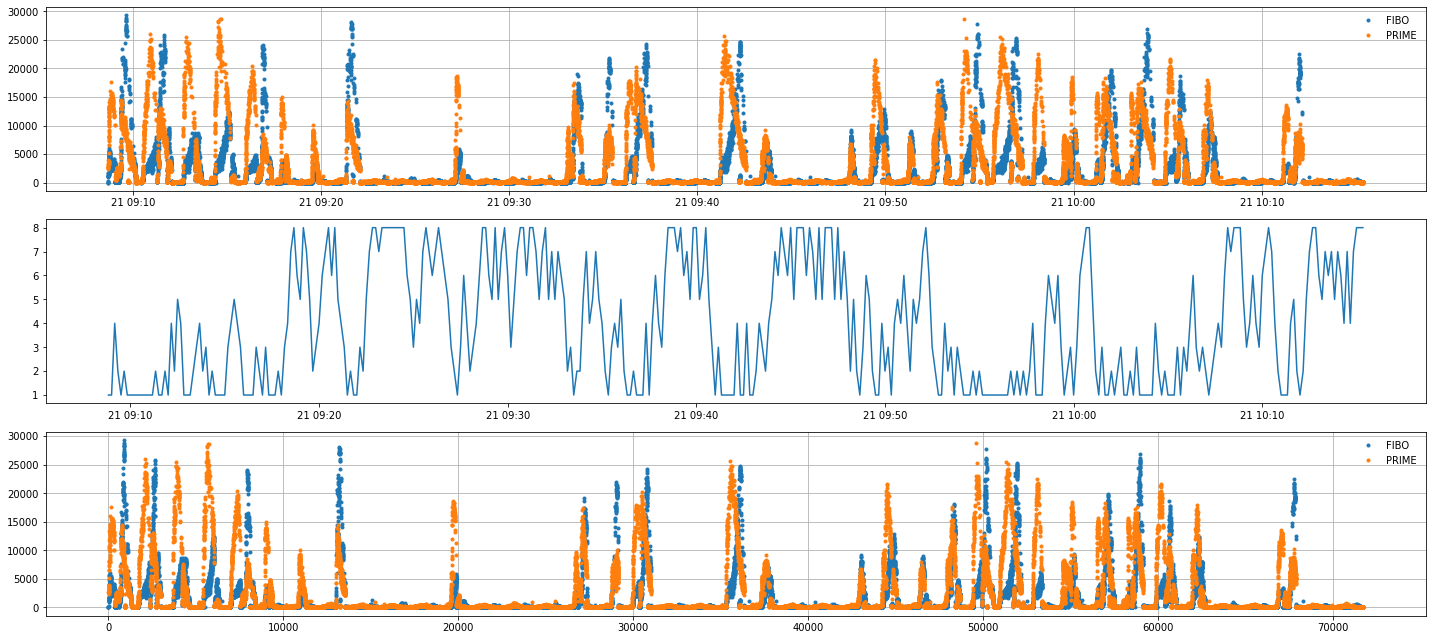

In [547]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [548]:
start_date = '2023-05-21 9:00'
end_date = '2023-05-21 10:30'

mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
F = FIBO.loc[mask]

F.shape

(36792, 20)

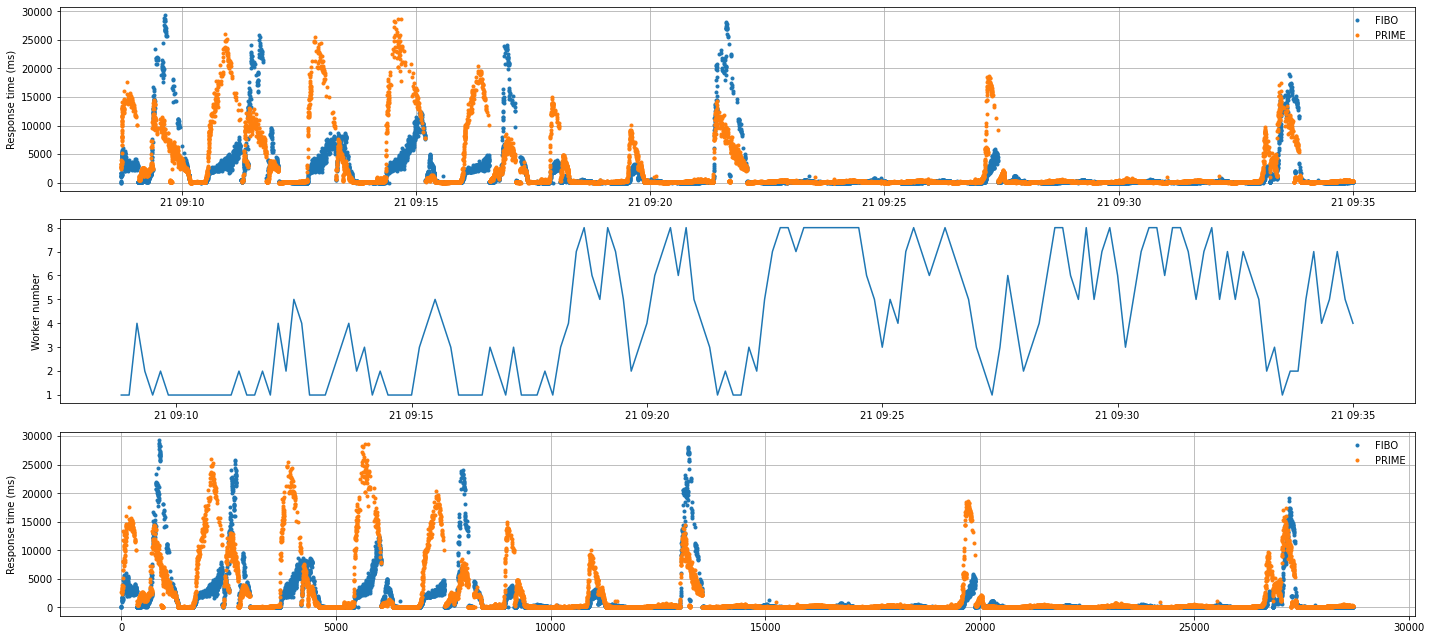

In [577]:
def zoom(start_date, end_date):

    mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
    F = FIBO.loc[mask]

    mask = (PRIME['date'] > start_date) & (PRIME['date'] <= end_date)
    P = PRIME.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(F['date'], F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax0.plot(P['date'], P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax0.set_ylabel('Response time (ms)')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.set_ylabel('Worker number')
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax2.plot(P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax2.set_ylabel('Response time (ms)')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-21 8:59', '2023-05-21 9:35')

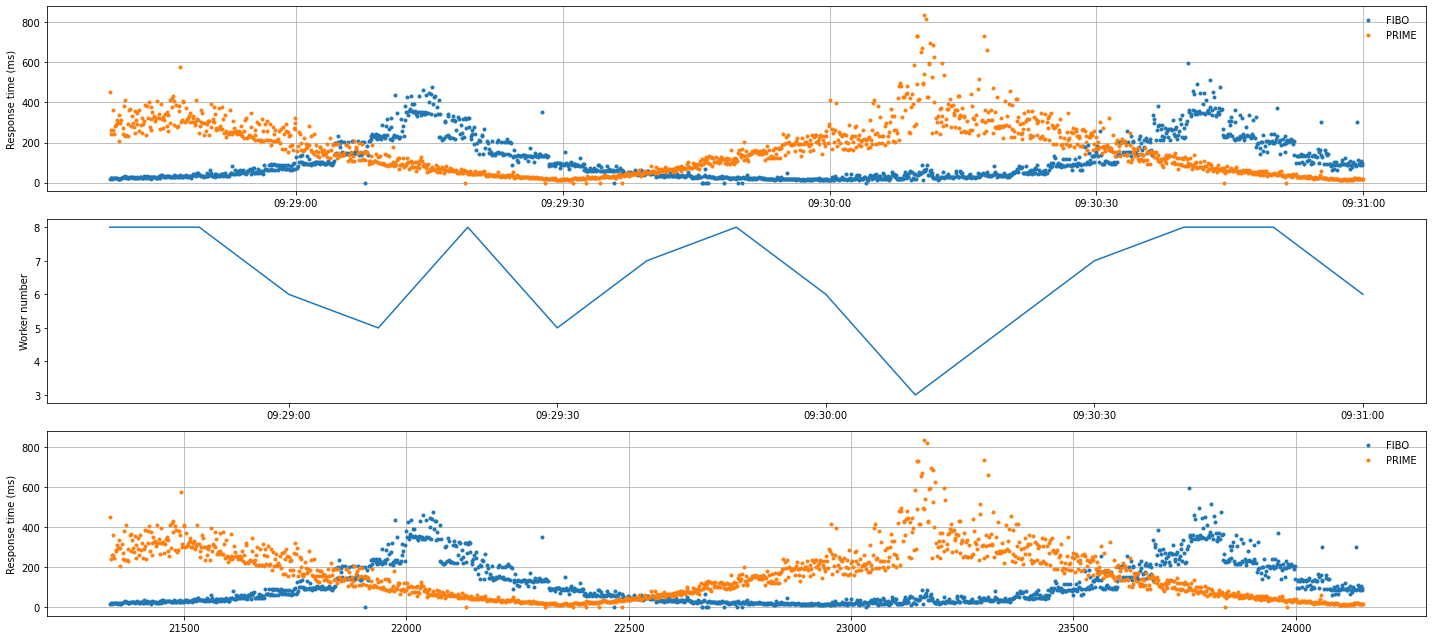

In [578]:
zoom('2023-05-21 9:28:39', '2023-05-21 9:31')

Hát azért így úgy tűnik, hogy magával húzza a másik REST API válaszidejét is.

## Helpers

In [ ]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)
